## Adatok betöltése

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# from scipy.cluster.hierarchy import dendrogram
# from scipy.cluster.hierarchy import linkage
# from scipy.cluster.hierarchy import fcluster

# https://scikit-learn.org/stable/modules/clustering.html

In [2]:
data = pd.read_csv('clustering_data.csv', delimiter=';', header=None, names=['x','y'], dtype={'x':np.float64, 'y':np.float64})
data

,x,y
0,-2.501949,3.634456
1,-1.741856,-0.207114
2,-1.178114,0.949219
3,-3.483569,-0.762401
4,-2.321847,-1.658007
...,...,...
995,-0.975418,3.349450
996,-0.841228,5.338849
997,-0.828702,4.613680
998,-2.294338,3.055510


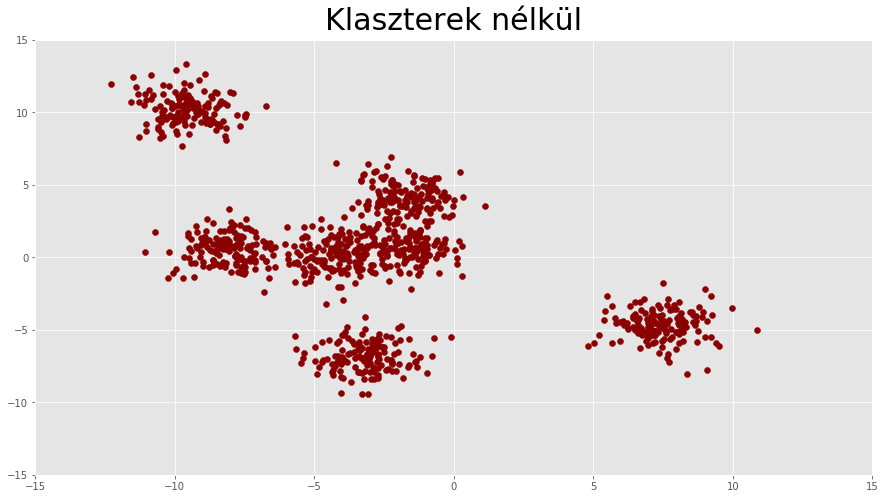

In [3]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 8))
plt.title('Klaszterek nélkül', fontdict={'fontsize':30}, pad=10)
plt.axis([-15, 15, -15, 15])
plt.scatter(data.x,data.y, color='darkred')
plt.show()

In [4]:
X=data.values

In [5]:
X

array([[-2.50194939,  3.63445605],
       [-1.74185604, -0.20711352],
       [-1.17811378,  0.9492195 ],
       ...,
       [-0.82870163,  4.61368015],
       [-2.294338  ,  3.05550969],
       [-2.02361951,  0.25916503]])

## Klaszterezés - KMeans

In [6]:
from sklearn.cluster import KMeans

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# euklideszi távolság

kmeans = KMeans(n_clusters=5).fit(X)
kmeans.labels_

array([4, 4, 4, 4, 4, 1, 4, 4, 0, 4, 0, 4, 0, 3, 1, 4, 1, 4, 4, 0, 3, 4,
       1, 4, 2, 3, 4, 2, 4, 3, 3, 0, 3, 3, 4, 0, 4, 0, 4, 3, 4, 2, 0, 0,
       0, 4, 4, 4, 3, 0, 4, 0, 3, 4, 0, 4, 1, 1, 1, 2, 3, 4, 1, 1, 0, 4,
       4, 2, 2, 3, 1, 4, 2, 0, 2, 0, 0, 4, 3, 4, 0, 2, 2, 4, 2, 4, 4, 2,
       1, 0, 4, 4, 3, 0, 4, 4, 4, 3, 3, 2, 0, 1, 4, 4, 4, 4, 2, 3, 4, 4,
       0, 2, 2, 0, 0, 4, 4, 1, 3, 0, 1, 2, 4, 4, 3, 2, 4, 3, 3, 2, 1, 0,
       0, 0, 3, 4, 0, 4, 4, 4, 4, 0, 0, 2, 2, 0, 3, 0, 4, 0, 0, 2, 4, 3,
       4, 4, 4, 4, 4, 2, 0, 2, 0, 0, 4, 0, 4, 0, 4, 4, 4, 1, 4, 4, 2, 1,
       4, 0, 0, 0, 3, 1, 4, 1, 3, 4, 3, 2, 4, 4, 4, 1, 0, 4, 3, 4, 4, 0,
       0, 4, 0, 0, 4, 3, 0, 0, 4, 4, 2, 4, 1, 2, 0, 4, 3, 0, 1, 3, 0, 0,
       0, 4, 1, 2, 1, 3, 0, 0, 4, 2, 2, 1, 3, 4, 3, 4, 1, 3, 4, 0, 4, 1,
       4, 0, 1, 4, 3, 0, 3, 4, 0, 4, 2, 1, 0, 3, 1, 4, 3, 0, 0, 0, 4, 1,
       3, 0, 3, 0, 1, 3, 4, 1, 4, 0, 2, 1, 4, 0, 4, 4, 2, 0, 1, 1, 4, 0,
       1, 1, 2, 4, 4, 4, 4, 3, 4, 0, 1, 1, 0, 3, 1,

In [7]:
kmeans.inertia_

3653.1764377382365

In [8]:
kmeans.predict([[0, 0], [12, 3]])

array([4, 1])

In [9]:
kmeans.cluster_centers_

array([[-7.25099037,  0.31056184],
       [ 7.41799128, -4.68044819],
       [-9.5656627 , 10.22746442],
       [-3.18511259, -6.7606506 ],
       [-2.1473562 ,  2.03078886]])

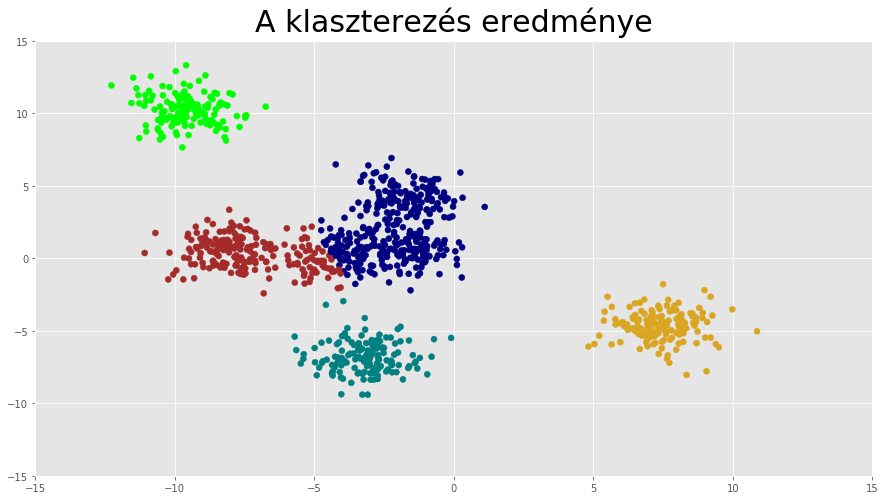

In [10]:
LABEL_COLOR_MAP = { 0:'brown'
                   ,1:'goldenrod'
                   ,2:'lime'
                   ,3:'teal'
                   ,4:'navy'
                   ,5:'magenta'}


label_color = [LABEL_COLOR_MAP[l] for l in kmeans.labels_]


plt.figure(figsize=(15, 8))
plt.title('A klaszterezés eredménye', fontdict={'fontsize':30}, pad=10)
plt.axis([-15, 15, -15, 15])
plt.scatter(data.x, data.y, c=label_color)
plt.savefig('klaszterek.png')
plt.show()

In [11]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
# inertia_: Sum of squared distances of samples to their closest cluster center.

In [12]:
distortions

[55155.478807922605,
 28216.125090675,
 15240.081159563364,
 7448.969630400545,
 3653.1764377382365,
 2346.7396517713732,
 1872.9022145336248,
 1747.077660278119,
 1649.4168954855743,
 1549.4522967818893,
 1458.36433550927,
 1351.7240730345623,
 1259.2260565720044,
 1184.2204235242323]

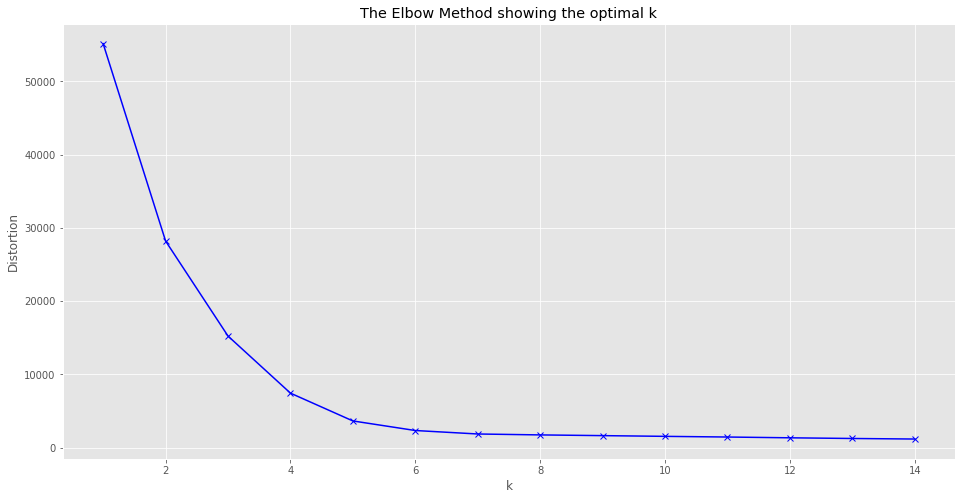

In [13]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Klaszterezés - DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
clustering = DBSCAN(eps=0.3, min_samples=5, metric='euclidean').fit(X)
#clustering.labels_

In [28]:
set(clustering.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [23]:
label_color

['brown',
 'brown',
 'brown',
 'brown',
 'black',
 'goldenrod',
 'brown',
 'brown',
 'lime',
 'brown',
 'black',
 'brown',
 'lime',
 'teal',
 'goldenrod',
 'brown',
 'black',
 'brown',
 'brown',
 'black',
 'teal',
 'brown',
 'black',
 'brown',
 'navy',
 'teal',
 'brown',
 'navy',
 'brown',
 'teal',
 'teal',
 'lime',
 'teal',
 'teal',
 'brown',
 'lime',
 'brown',
 'lime',
 'brown',
 'teal',
 'brown',
 'black',
 'lime',
 'lime',
 'brown',
 'brown',
 'brown',
 'brown',
 'teal',
 'lime',
 'brown',
 'lime',
 'teal',
 'brown',
 'brown',
 'brown',
 'goldenrod',
 'goldenrod',
 'black',
 'navy',
 'teal',
 'brown',
 'black',
 'goldenrod',
 'lime',
 'brown',
 'brown',
 'navy',
 'navy',
 'teal',
 'goldenrod',
 'brown',
 'navy',
 'lime',
 'navy',
 'brown',
 'lime',
 'brown',
 'teal',
 'brown',
 'lime',
 'navy',
 'navy',
 'brown',
 'navy',
 'brown',
 'brown',
 'black',
 'goldenrod',
 'lime',
 'brown',
 'brown',
 'teal',
 'brown',
 'brown',
 'brown',
 'brown',
 'teal',
 'teal',
 'black',
 'brown',
 '

In [29]:
LABEL_COLOR_MAP = { 0:'brown'
                   ,1:'goldenrod'
                   ,2:'lime'
                   ,3:'teal'
                   ,4:'navy'
                   ,5:'maroon'
                   ,6:'magenta'
                   ,7:'magenta'
                   ,8:'magenta'
                   ,9:'magenta'
                   ,10:'magenta'
                   ,11:'magenta'
                   ,12:'magenta'
                   ,13:'magenta'
                   ,14:'magenta'
                   ,15:'magenta'
                   ,16:'magenta'
                   ,17:'magenta'
                   ,-1: 'black'}


label_color = [LABEL_COLOR_MAP[l] for l in clustering.labels_]


plt.figure(figsize=(15, 8))
plt.title('A klaszterezés eredménye', fontdict={'fontsize':30}, pad=10)
plt.axis([-15, 15, -15, 15])
plt.scatter(data.x, data.y, c=label_color)
plt.savefig('klaszterek.png')
plt.show()

KeyError: 22

We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [17]:
distances

array([[0.        , 0.12149825, 0.13538679, 0.15579494],
       [0.        , 0.01076804, 0.14312304, 0.1686802 ],
       [0.        , 0.18589841, 0.24197127, 0.25252924],
       ...,
       [0.        , 0.05014247, 0.12040769, 0.15955304],
       [0.        , 0.14729334, 0.17905439, 0.28029845],
       [0.        , 0.11893074, 0.1276674 , 0.19998397]])

In [18]:
indices

array([[  0, 982, 719, 957],
       [  1, 592,  17, 836],
       [  2, 558, 335, 716],
       ...,
       [997, 356, 189, 552],
       [998, 188,  96, 311],
       [999, 409, 742, 739]], dtype=int64)

In [19]:
distances[:,1]

array([0.12149825, 0.01076804, 0.18589841, 0.09346591, 0.69473516,
       0.20845761, 0.22529107, 0.06964963, 0.04760381, 0.16609944,
       0.109889  , 0.2224136 , 0.14663177, 0.06229977, 0.41031242,
       0.15736124, 0.82793684, 0.14149591, 0.08240111, 0.62630751,
       0.2124175 , 0.11638891, 0.19927822, 0.12172181, 0.28138769,
       0.42164506, 0.18792573, 0.04972807, 0.23277595, 0.15267891,
       0.41042321, 0.16332411, 0.23161463, 0.0773311 , 0.10721473,
       0.15025521, 0.2570864 , 0.15490741, 0.18692626, 0.1164614 ,
       0.18187659, 0.86633062, 0.22811296, 0.09966026, 0.07589375,
       0.0204882 , 0.07255392, 0.04452819, 0.11078332, 0.11532016,
       0.07597432, 0.15490741, 0.09375607, 0.13363455, 0.21416337,
       0.06962212, 0.15364474, 0.05182409, 0.24226677, 0.04080071,
       0.16034384, 0.38632257, 0.71683292, 0.12818267, 0.18058705,
       0.18089801, 0.06110215, 0.24126905, 0.08500462, 0.36072644,
       0.11075414, 0.05597588, 0.12728323, 0.14043197, 0.22211

In [20]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

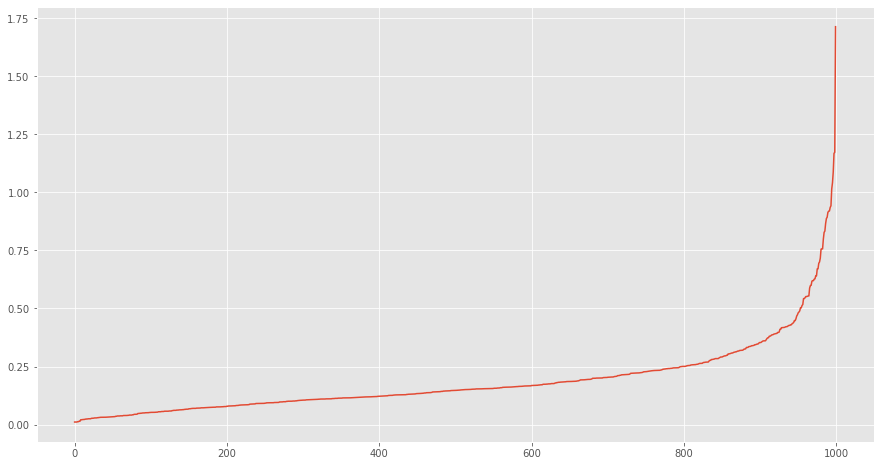

In [21]:
plt.figure(figsize=(15, 8))
plt.plot(distances)